# The purpose of this notebook is to make the comparison between mocks and BOSS DR14 data on bins of magnitudes in the g band and bins in redshifts.

In [1]:
import numpy as np
import scipy as sp
import fitsio
import matplotlib.pyplot as plt
from desispec.interpolation import resample_flux
from astropy.io import fits
from astropy.table import Table,Column
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
### BOSS DR14 DATA
data = {}
data['path_base'] = '/global/cscratch1/sd/rodcn25/lya/pruebas_simqso/fits file/bins/'
fdata11 = data['path_base']+'d14_magv1_zv1.fits'
fdata22 = data['path_base']+'d14_magv2_zv2.fits'
fdata33 = data['path_base']+'d14_magv3_zv3.fits'
DS11 = fitsio.FITS(fdata11)
DS22 = fitsio.FITS(fdata22)
DS33 = fitsio.FITS(fdata33)

In [9]:
### MOCKS
mocks = {}
specfile11 = data['path_base']+'dmock_magv1_zv1.fits'
specfile22 = data['path_base']+'dmock_magv2_zv2.fits'
specfile33 = data['path_base']+'dmock_magv3_zv3.fits'
MG11 = fitsio.FITS(specfile11)
MG22 = fitsio.FITS(specfile22)
MG33 = fitsio.FITS(specfile33)

# 20 < MAG < 20.5 and 2.4 < z < 2.6.

## Mocks

In [13]:
conti_mock = []
for i in range(len(MG11[4]['coeff'].read())):
    spectram = []
    for j in range(4):
        spectram.append(MG11[4]['coeff'].read()[i][j]*MG11[3]['eigenvec'].read()[j])
    spectrasm = np.vstack(spectram)
    specm = np.sum(spectrasm,axis = 0)
    conti_mock += [specm]
continuum_mock = np.vstack(conti_mock)

In [14]:
dw = 0.28
new_wave = np.arange(600, 3000, dw)
flux_mock = np.zeros((len(continuum_mock), new_wave.size))
for i in range(len(continuum_mock)):
    flux_mock[i] = resample_flux(new_wave, MG11[1]['wavelength'].read(), MG11[1]['mean spectrum'].read()+continuum_mock[i])

In [15]:
lmin=1280.0
lmax=1500.0
integral_mock = []
continuum_nor_mock = []
for i in range(len(flux_mock)):
    sum2=0
    for j in range(len(flux_mock[i])):
        if lmin <= new_wave[j] < lmax :
            sum2+=(flux_mock[i][j])*(new_wave[j+1]-new_wave[j])
        elif (new_wave[j] > lmax):
            break
    integral_mock.append(sum2)
    continuum_nor_mock.append(flux_mock[i]/sum2)
contin_mock = np.vstack(continuum_nor_mock)

In [16]:
contin_mock = np.vstack(continuum_nor_mock)
stack_mock = np.mean(contin_mock,axis=0)     # mean continuum.
std_stack_mock = np.std(contin_mock,axis=0)  # standard deviation.

## Data

In [19]:
conti_boss = []
for i in range(len(DS11[4]['coeff'].read())):
    spectra = []
    for j in range(4):
        spectra.append(DS11[4]['coeff'].read()[i][j]*DS11[3]['eigenvec'].read()[j])
    spectras = np.vstack(spectra)
    spec = np.sum(spectras,axis = 0)
    conti_boss += [spec]
continuum_boss = np.vstack(conti_boss)

In [20]:
qsofluxd = np.zeros((len(continuum_boss), new_wave.size))
for i in range(len(continuum_boss)):
    qsofluxd[i] = resample_flux(new_wave,DS11[1]['wavelength'].read(),DS11[1]['mean spectrum'].read()+continuum_boss[i])

In [21]:
integral_boss = []
continuum_nor_boss = []
for i in range(len(continuum_boss)):
    sum1=0
    for j in range(len(continuum_boss[i])):
        if lmin <= new_wave[j] < lmax :
            sum1+=(qsofluxd[i][j])*(new_wave[j+1]-new_wave[j])
        elif (new_wave[j] > lmax):
            break
    integral_boss.append(sum1)
    continuum_nor_boss.append((qsofluxd[i])/sum1)
contin_boss = np.vstack(continuum_nor_boss)

In [22]:
stack_boss = np.mean(contin_boss,axis=0)
std_stack_boss = np.std(contin_boss,axis=0)

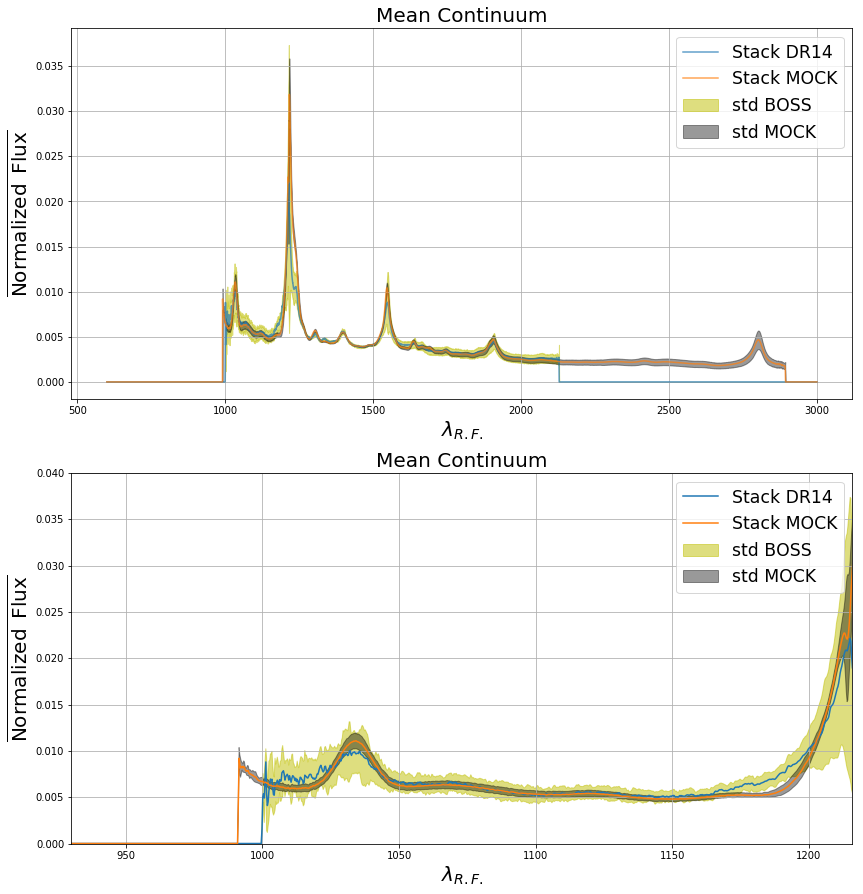

In [29]:
plt.figure(figsize=(14,15))
plt.subplot(2,1,1)
plt.title('Mean Continuum',fontsize = 20)
plt.plot(new_wave,stack_boss,'-', label='Stack DR14',alpha=0.7)
plt.fill_between(new_wave,stack_boss+std_stack_boss,stack_boss-std_stack_boss, label='std BOSS', color = 'y', alpha=0.5)
plt.plot(new_wave,stack_mock,'-', label='Stack MOCK',alpha=0.7)
plt.fill_between(new_wave,stack_mock+std_stack_mock,stack_mock-std_stack_mock, label='std MOCK', color = 'k', alpha=0.4)
#plt.xlim(900,1600)
#plt.ylim(-0.002,0.01)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

plt.subplot(2,1,2)
plt.title('Mean Continuum',fontsize = 20)
plt.plot(new_wave,stack_boss,'-', label='Stack DR14')
plt.fill_between(new_wave,stack_boss+std_stack_boss,stack_boss-std_stack_boss, label='std BOSS', color = 'y', alpha=0.5)
plt.plot(new_wave,stack_mock,'-', label='Stack MOCK')
plt.fill_between(new_wave,stack_mock+std_stack_mock,stack_mock-std_stack_mock, label='std MOCK', color = 'k', alpha=0.4)
plt.xlim(930,1216)
plt.ylim(0,0.04)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

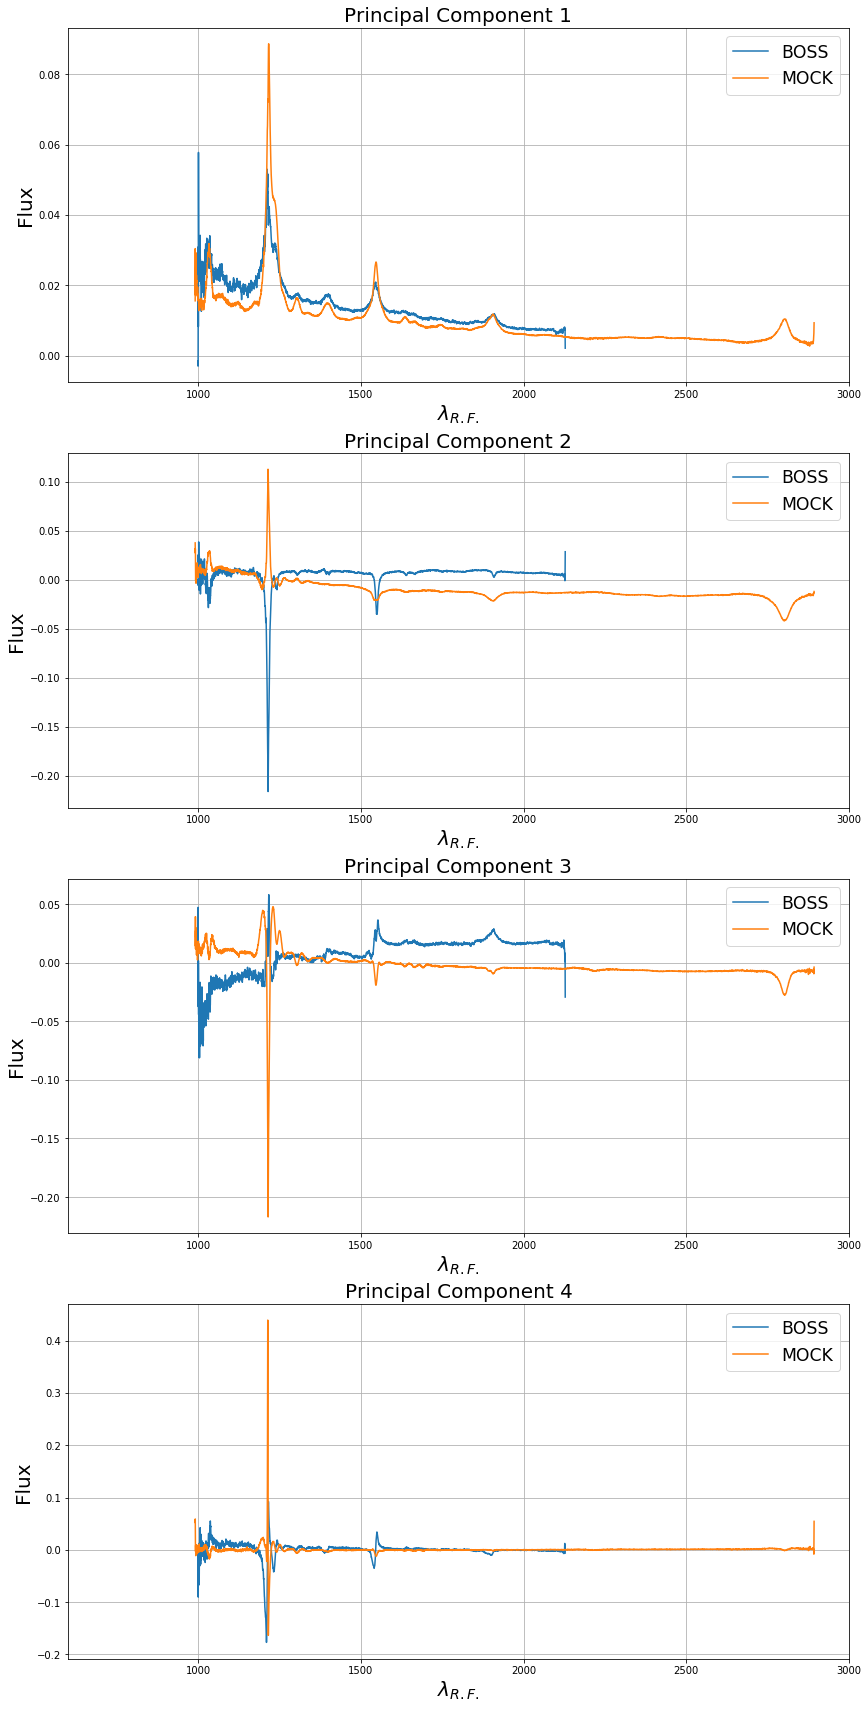

In [31]:
plt.figure(figsize=(14,30))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.title('Principal Component {}'.format(i+1),fontsize=20)
    plt.plot(DS11[1]['wavelength'].read(),DS11[3]['eigenvec'].read()[i],label='BOSS')
    plt.plot(MG11[1]['wavelength'].read(),MG11[3]['eigenvec'].read()[i],label='MOCK')
    plt.xlim(600,3000)
    #plt.ylim(-2,10)
    plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
    plt.ylabel('Flux', fontsize = 20)
    #plt.ylabel('$\mathrm{\overline{Flux}}$', fontsize = 20)
    plt.legend(fontsize='xx-large')
    plt.grid()

# 21 < MAG < 21.5 and 2.6 < z < 2.8.

## Mocks

In [33]:
conti_mock22 = []
for i in range(len(MG22[4]['coeff'].read())):
    spectram = []
    for j in range(4):
        spectram.append(MG22[4]['coeff'].read()[i][j]*MG22[3]['eigenvec'].read()[j])
    spectrasm = np.vstack(spectram)
    specm = np.sum(spectrasm,axis = 0)
    conti_mock22 += [specm]
continuum_mock22 = np.vstack(conti_mock22)

In [34]:
flux_mock22 = np.zeros((len(continuum_mock22), new_wave.size))
for i in range(len(continuum_mock22)):
    flux_mock22[i] = resample_flux(new_wave, MG22[1]['wavelength'].read(), MG22[1]['mean spectrum'].read()+continuum_mock22[i])

In [36]:
integral_mock22 = []
continuum_nor_mock22 = []
for i in range(len(flux_mock22)):
    sum2=0
    for j in range(len(flux_mock22[i])):
        if lmin <= new_wave[j] < lmax :
            sum2+=(flux_mock22[i][j])*(new_wave[j+1]-new_wave[j])
        elif (new_wave[j] > lmax):
            break
    integral_mock22.append(sum2)
    continuum_nor_mock22.append(flux_mock22[i]/sum2)
contin_mock22 = np.vstack(continuum_nor_mock22)

In [37]:
stack_mock22 = np.mean(contin_mock22,axis=0)     # mean continuum.
std_stack_mock22 = np.std(contin_mock22,axis=0)  # standard deviation.

# DATA

In [38]:
conti_boss22 = []
for i in range(len(DS22[4]['coeff'].read())):
    spectra = []
    for j in range(4):
        spectra.append(DS22[4]['coeff'].read()[i][j]*DS22[3]['eigenvec'].read()[j])
    spectras = np.vstack(spectra)
    spec = np.sum(spectras,axis = 0)
    conti_boss22 += [spec]
continuum_boss22 = np.vstack(conti_boss22)

In [39]:
qsofluxd22 = np.zeros((len(continuum_boss22), new_wave.size))
for i in range(len(continuum_boss22)):
    qsofluxd22[i] = resample_flux(new_wave,DS22[1]['wavelength'].read(),DS22[1]['mean spectrum'].read()+continuum_boss22[i])

In [41]:
integral_boss22 = []
continuum_nor_boss22 = []
for i in range(len(continuum_boss22)):
    sum1=0
    for j in range(len(continuum_boss22[i])):
        if lmin <= new_wave[j] < lmax :
            sum1+=(qsofluxd22[i][j])*(new_wave[j+1]-new_wave[j])
        elif (new_wave[j] > lmax):
            break
    integral_boss22.append(sum1)
    continuum_nor_boss22.append((qsofluxd22[i])/sum1)
contin_boss22 = np.vstack(continuum_nor_boss22)

stack_boss22 = np.mean(contin_boss22,axis=0)
std_stack_boss22 = np.std(contin_boss22,axis=0)

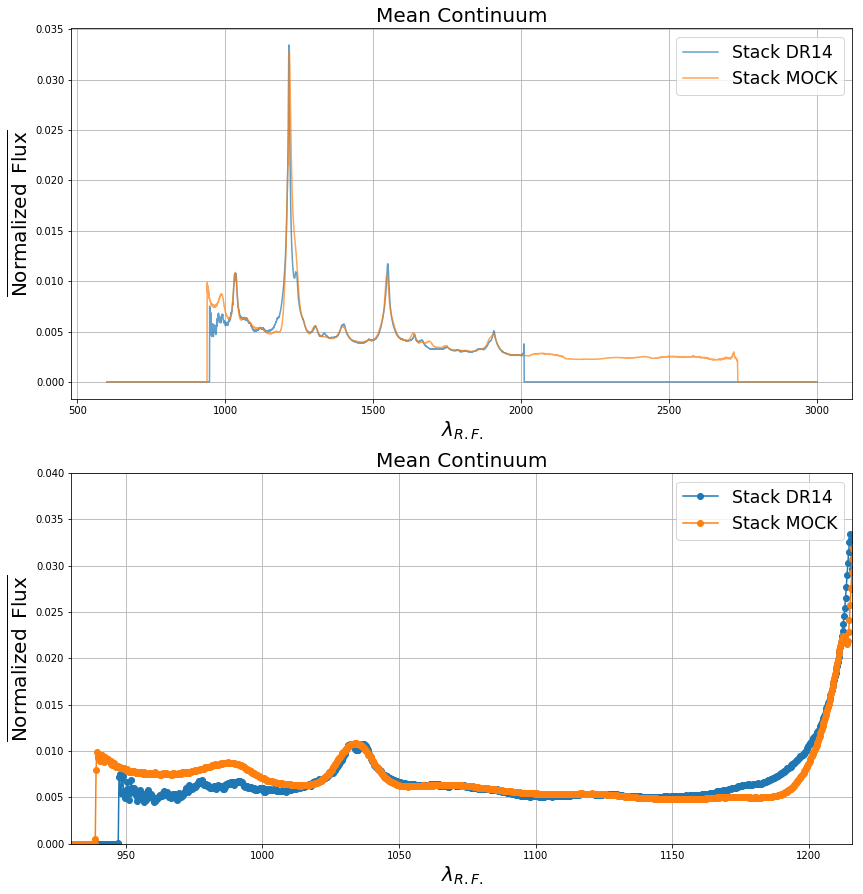

In [55]:
plt.figure(figsize=(14,15))
plt.subplot(2,1,1)
plt.title('Mean Continuum',fontsize = 20)
plt.plot(new_wave,stack_boss22,'-', label='Stack DR14',alpha=0.7)
#plt.fill_between(new_wave,stack_boss22+std_stack_boss22,stack_boss22-std_stack_boss22, label='std BOSS', color = 'y', alpha=0.5)
plt.plot(new_wave,stack_mock22,'-', label='Stack MOCK',alpha=0.7)
#plt.fill_between(new_wave,stack_mock22+std_stack_mock22,stack_mock22-std_stack_mock22, label='std MOCK', color = 'k', alpha=0.4)
#plt.xlim(900,1600)
#plt.ylim(-0.002,0.01)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

plt.subplot(2,1,2)
plt.title('Mean Continuum',fontsize = 20)
plt.plot(new_wave,stack_boss22,'-o', label='Stack DR14')
#plt.fill_between(new_wave,stack_boss22+std_stack_boss22,stack_boss22-std_stack_boss22, label='std BOSS', color = 'y', alpha=0.5)
plt.plot(new_wave,stack_mock22,'-o', label='Stack MOCK')
#plt.fill_between(new_wave,stack_mock+std_stack_mock,stack_mock-std_stack_mock, label='std MOCK', color = 'k', alpha=0.4)
plt.xlim(930,1216)
plt.ylim(0,0.04)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

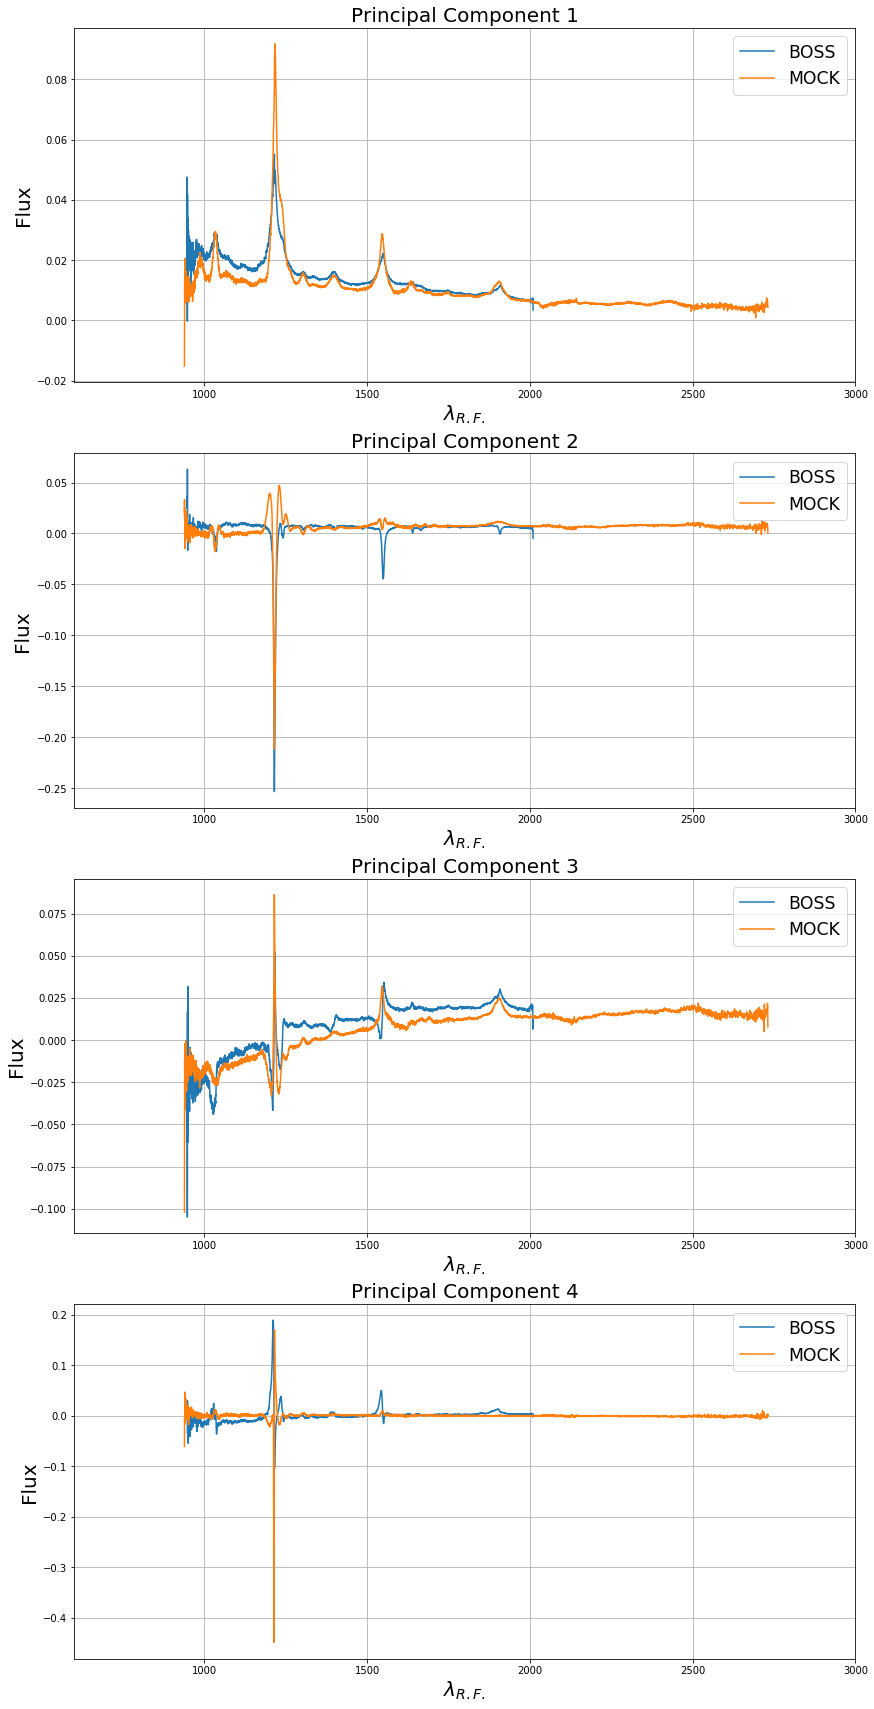

In [44]:
plt.figure(figsize=(14,30))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.title('Principal Component {}'.format(i+1),fontsize=20)
    plt.plot(DS22[1]['wavelength'].read(),DS22[3]['eigenvec'].read()[i],label='BOSS')
    plt.plot(MG22[1]['wavelength'].read(),MG22[3]['eigenvec'].read()[i],label='MOCK')
    plt.xlim(600,3000)
    #plt.ylim(-2,10)
    plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
    plt.ylabel('Flux', fontsize = 20)
    #plt.ylabel('$\mathrm{\overline{Flux}}$', fontsize = 20)
    plt.legend(fontsize='xx-large')
    plt.grid()

# 21.5 < MAG < 22.0 and 3.0 < z < 3.2.

## Mocks

In [47]:
conti_mock33 = []
for i in range(len(MG33[4]['coeff'].read())):
    spectram = []
    for j in range(4):
        spectram.append(MG33[4]['coeff'].read()[i][j]*MG33[3]['eigenvec'].read()[j])
    spectrasm = np.vstack(spectram)
    specm = np.sum(spectrasm,axis = 0)
    conti_mock33 += [specm]
continuum_mock33 = np.vstack(conti_mock33)

In [48]:
flux_mock33 = np.zeros((len(continuum_mock33), new_wave.size))
for i in range(len(continuum_mock33)):
    flux_mock33[i] = resample_flux(new_wave, MG33[1]['wavelength'].read(), MG33[1]['mean spectrum'].read()+continuum_mock33[i])

In [49]:
integral_mock33 = []
continuum_nor_mock33 = []
for i in range(len(flux_mock33)):
    sum2=0
    for j in range(len(flux_mock33[i])):
        if lmin <= new_wave[j] < lmax :
            sum2+=(flux_mock33[i][j])*(new_wave[j+1]-new_wave[j])
        elif (new_wave[j] > lmax):
            break
    integral_mock33.append(sum2)
    continuum_nor_mock33.append(flux_mock33[i]/sum2)
contin_mock33 = np.vstack(continuum_nor_mock33)

In [50]:
stack_mock33 = np.mean(contin_mock33,axis=0)     # mean continuum.
std_stack_mock33 = np.std(contin_mock33,axis=0)  # standard deviation.

## Data

In [51]:
conti_boss33 = []
for i in range(len(DS33[4]['coeff'].read())):
    spectra = []
    for j in range(4):
        spectra.append(DS33[4]['coeff'].read()[i][j]*DS33[3]['eigenvec'].read()[j])
    spectras = np.vstack(spectra)
    spec = np.sum(spectras,axis = 0)
    conti_boss33 += [spec]
continuum_boss33 = np.vstack(conti_boss33)

In [52]:
qsofluxd33 = np.zeros((len(continuum_boss33), new_wave.size))
for i in range(len(continuum_boss33)):
    qsofluxd33[i] = resample_flux(new_wave,DS33[1]['wavelength'].read(),DS33[1]['mean spectrum'].read()+continuum_boss33[i])

In [53]:
integral_boss33 = []
continuum_nor_boss33 = []
for i in range(len(continuum_boss33)):
    sum1=0
    for j in range(len(continuum_boss33[i])):
        if lmin <= new_wave[j] < lmax :
            sum1+=(qsofluxd33[i][j])*(new_wave[j+1]-new_wave[j])
        elif (new_wave[j] > lmax):
            break
    integral_boss33.append(sum1)
    continuum_nor_boss33.append((qsofluxd33[i])/sum1)
contin_boss33 = np.vstack(continuum_nor_boss33)

stack_boss33 = np.mean(contin_boss33,axis=0)
std_stack_boss33 = np.std(contin_boss33,axis=0)

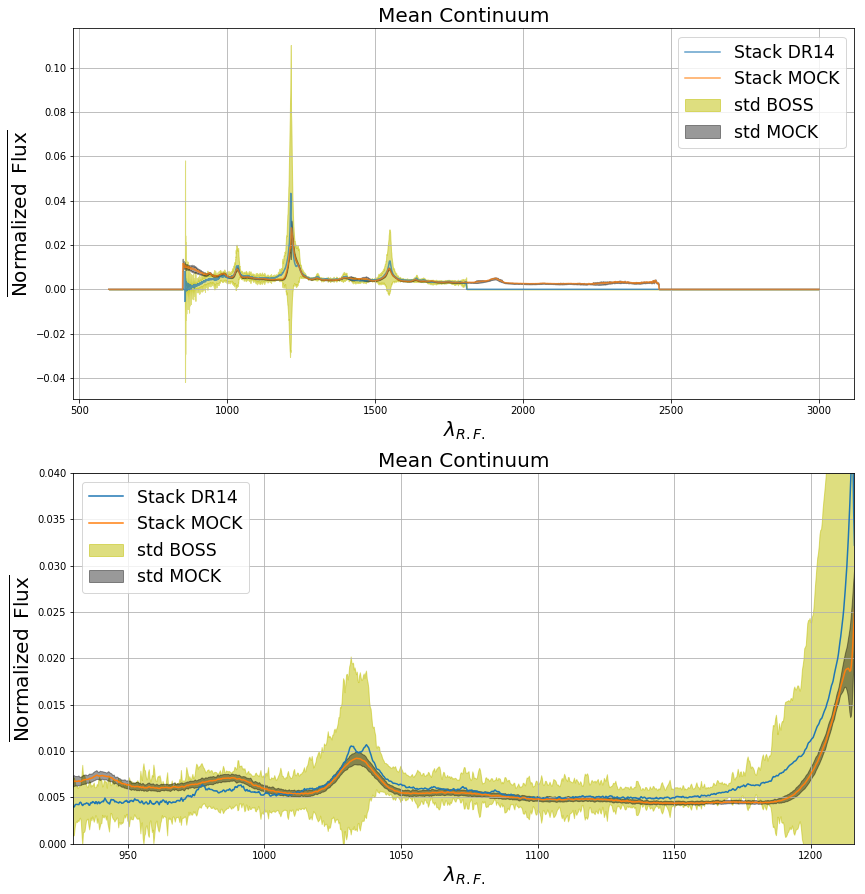

In [58]:
plt.figure(figsize=(14,15))
plt.subplot(2,1,1)
plt.title('Mean Continuum',fontsize = 20)
plt.plot(new_wave,stack_boss33,'-', label='Stack DR14',alpha=0.7)
plt.fill_between(new_wave,stack_boss33+std_stack_boss33,stack_boss33-std_stack_boss33, label='std BOSS', color = 'y', alpha=0.5)
plt.plot(new_wave,stack_mock33,'-', label='Stack MOCK',alpha=0.7)
plt.fill_between(new_wave,stack_mock33+std_stack_mock33,stack_mock33-std_stack_mock33, label='std MOCK', color = 'k', alpha=0.4)
#plt.xlim(900,1600)
#plt.ylim(-0.002,0.01)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

plt.subplot(2,1,2)
plt.title('Mean Continuum',fontsize = 20)
plt.plot(new_wave,stack_boss33,'-', label='Stack DR14')
plt.fill_between(new_wave,stack_boss33+std_stack_boss33,stack_boss33-std_stack_boss33, label='std BOSS', color = 'y', alpha=0.5)
plt.plot(new_wave,stack_mock33,'-', label='Stack MOCK')
plt.fill_between(new_wave,stack_mock33+std_stack_mock33,stack_mock33-std_stack_mock33, label='std MOCK', color = 'k', alpha=0.4)
plt.xlim(930,1216)
plt.ylim(0,0.04)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

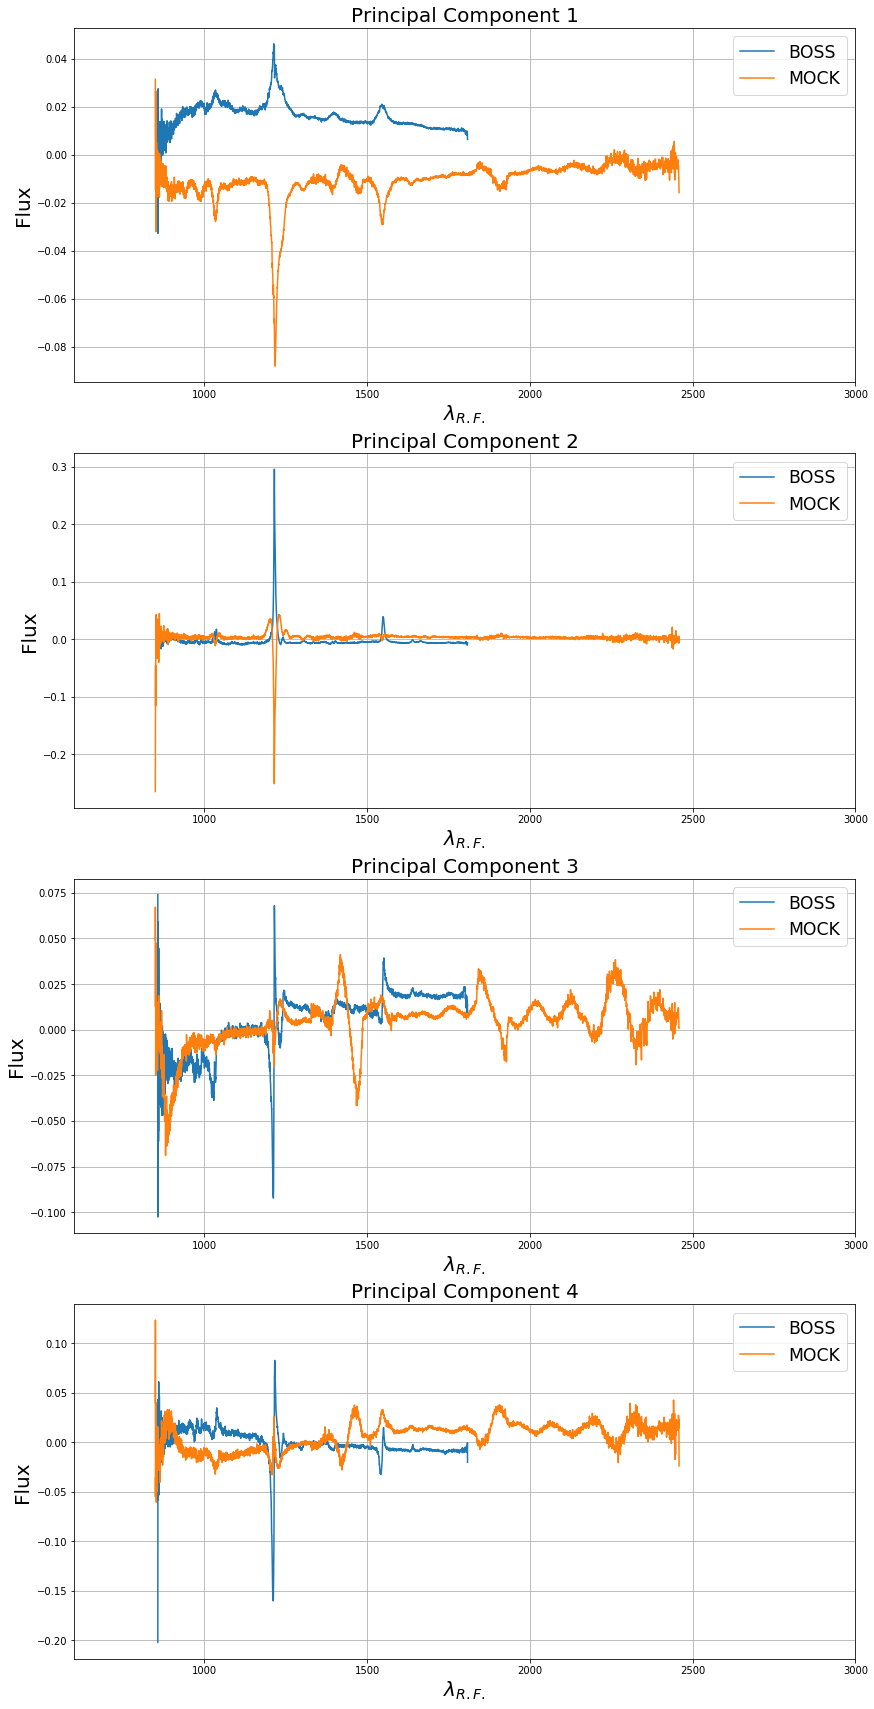

In [56]:
plt.figure(figsize=(14,30))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.title('Principal Component {}'.format(i+1),fontsize=20)
    plt.plot(DS33[1]['wavelength'].read(),DS33[3]['eigenvec'].read()[i],label='BOSS')
    plt.plot(MG33[1]['wavelength'].read(),MG33[3]['eigenvec'].read()[i],label='MOCK')
    plt.xlim(600,3000)
    #plt.ylim(-2,10)
    plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
    plt.ylabel('Flux', fontsize = 20)
    #plt.ylabel('$\mathrm{\overline{Flux}}$', fontsize = 20)
    plt.legend(fontsize='xx-large')
    plt.grid()